C:\Users\wes.scoggin\AppData\Local\conda\conda\envs\Py27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Coeff:  [ 5.44814029]
Intercept:  -102360.543294
Score:  0.0455091926995
Score:  -1.48499241737


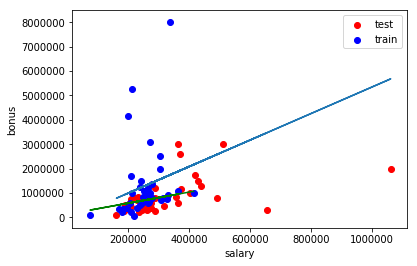

new Coeff:  [ 2.27410114]
new Intercept:  124444.388866
new Score:  -0.123597985403
new Score:  0.251488150398


In [1]:
# %load finance_regression.py
#!/usr/bin/python

"""
    Starter code for the regression mini-project.
    
    Loads up/formats a modified version of the dataset
    (why modified?  we've removed some trouble points
    that you'll find yourself in the outliers mini-project).

    Draws a little scatterplot of the training/testing data

    You fill in the regression code where indicated:
"""    


import sys
import pickle
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("../final_project/final_project_dataset_modified.pkl", "r") )

### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "salary"]
#features_list = ['bonus', 'long_term_incentive' ]

data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"



### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and 
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.


from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(feature_train, target_train)
print "Coeff: ", reg.coef_
print "Intercept: ", reg.intercept_
print "Score: ", reg.score(feature_train, target_train)
print "Score: ", reg.score(feature_test, target_test)

### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")




### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass

reg.fit(feature_test, target_test)
plt.plot(feature_train, reg.predict(feature_train), color="g") 

plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

print "new Coeff: ", reg.coef_
print "new Intercept: ", reg.intercept_
print "new Score: ", reg.score(feature_train, target_train)
print "new Score: ", reg.score(feature_test, target_test)

